# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [49]:
Ann_arbor=pd.read_csv(r'C:\Users\anoop\Desktop\python programs\Data Analysis\assig2.csv',parse_dates=['Date'])
Ann_arbor['Year']=Ann_arbor['Date'].dt.year
Ann_arbor.head()

,ID,Date,Element,Data_Value,Year
0,USW00094889,2014-11-12,TMAX,22,2014
1,USC00208972,2009-04-29,TMIN,56,2009
2,USC00200032,2008-05-26,TMAX,278,2008
3,USC00205563,2005-11-11,TMAX,139,2005
4,USC00200230,2014-02-27,TMAX,-106,2014


In [50]:
Ann_arbor.sort_values('Date',ascending=True,inplace=True)
Ann_arbor.tail()

,ID,Date,Element,Data_Value,Year
45691,USC00200032,2015-12-31,TMAX,11,2015
10573,USC00205050,2015-12-31,TMIN,-17,2015
21088,USC00208202,2015-12-31,TMAX,0,2015
10253,USC00201250,2015-12-31,TMIN,-6,2015
29410,USC00200230,2015-12-31,TMIN,-17,2015


In [51]:
import numpy as np
maxd={}
mind={}
for i in Ann_arbor['Year'].unique():
    if i%4==0:
        Ann_arbor.drop(Ann_arbor[Ann_arbor['Date']==pd.Timestamp(i-2-29)].index,inplace=True)
        #Ann_arbor.drop('year')
if any(Ann_arbor['Date']==pd.Timestamp(2008-2-29)):
    print('yes')
else:
    print('No')
   

No


In [52]:
maxmin=Ann_arbor.groupby('Date',as_index=False)['Data_Value'].agg({'Data_Value':[np.max,np.min]})
maxmin.head()

Date Data_Value     
                   amax amin
0 2005-01-01        156  -56
1 2005-01-02        139  -56
2 2005-01-03        133    0
3 2005-01-04         39  -39
4 2005-01-05         33  -94

In [53]:
maxmin['Year']=maxmin['Date'].dt.year
maxmin.head()

Date Data_Value       Year
                   amax amin      
0 2005-01-01        156  -56  2005
1 2005-01-02        139  -56  2005
2 2005-01-03        133    0  2005
3 2005-01-04         39  -39  2005
4 2005-01-05         33  -94  2005

In [54]:
print(maxmin['Year'].unique())

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [55]:
maxmin['Month'],maxmin['Day']= maxmin['Date'].dt.month, maxmin['Date'].dt.day
maxmin.head()

Date Data_Value       Year Month Day
                   amax amin                
0 2005-01-01        156  -56  2005     1   1
1 2005-01-02        139  -56  2005     1   2
2 2005-01-03        133    0  2005     1   3
3 2005-01-04         39  -39  2005     1   4
4 2005-01-05         33  -94  2005     1   5

In [56]:
maxmin.columns=['Date','max1','min1','year','month','day']
maxmin.head()

,Date,max1,min1,year,month,day
0,2005-01-01,156,-56,2005,1,1
1,2005-01-02,139,-56,2005,1,2
2,2005-01-03,133,0,2005,1,3
3,2005-01-04,39,-39,2005,1,4
4,2005-01-05,33,-94,2005,1,5


In [57]:
maxk15=pd.DataFrame(columns=['Date','max1']) #dataframe to store 2015 record breaking max temp
maxk15=maxk15.astype({'Date':'datetime64','max1':'int64'})
maxk15.dtypes
mink15=pd.DataFrame(columns=['Date','min1']) #dataframe to store 2015 record breaking min temp
mink15=mink15.astype({'Date':'datetime64','min1':'int64'})
mink15.dtypes

Date    datetime64[ns]
min1             int64
dtype: object

In [58]:
maxt=pd.DataFrame(columns=['Date','maxd']) #df to store max of temp on any day on decade
maxt=maxt.astype({'Date':'datetime64','maxd':'int64'})
mint=pd.DataFrame(columns=['Date','mind']) #df to store 
mint=mint.astype({'Date':'datetime64','mind':'int64'})

In [59]:
amax=maxmin[['Date','max1']]
amin=maxmin[['Date','min1']]
for month in maxmin['month'].unique():
    for day in maxmin['day'].unique():
        try:
            max15=amax[amax['Date']==pd.Timestamp(2015,month,day)].max1.values
            min15=amin[amin['Date']==pd.Timestamp(2015,month,day)].min1.values
            maxother=max(list(amax[amax['Date']==pd.Timestamp(i,month,day)].max1.values for i in range(2005,2015))) #list comprehension
            minother=min(list(amin[amin['Date']==pd.Timestamp(i,month,day)].min1.values for i in range(2005,2015)))
            maxt=maxt.append({'Date':pd.Timestamp(2015,month,day),'maxd':maxother[0]},ignore_index=True)
            mint=mint.append({'Date':pd.Timestamp(2015,month,day),'mind':minother[0]},ignore_index=True)
            if max15[0]>maxother[0]:
                #print('maxt')
                maxk15=maxk15.append({'Date':pd.Timestamp(2015,month,day),'max1':max15[0]},ignore_index=True)
            if min15[0]<minother[0]:
                #print('mint')
                mink15=mink15.append({'Date':pd.Timestamp(2015,month,day),'min1':min15[0]},ignore_index=True)
        except ValueError:
            #print('Value error')
            continue
maxt.head()
                

,Date,maxd
0,2015-01-01,156
1,2015-01-02,139
2,2015-01-03,133
3,2015-01-04,106
4,2015-01-05,128


In [60]:
maxt.tail()

,Date,maxd
360,2015-12-27,189
361,2015-12-28,194
362,2015-12-29,128
363,2015-12-30,117
364,2015-12-31,139


In [61]:
%matplotlib notebook

<IPython.core.display.Javascript object>


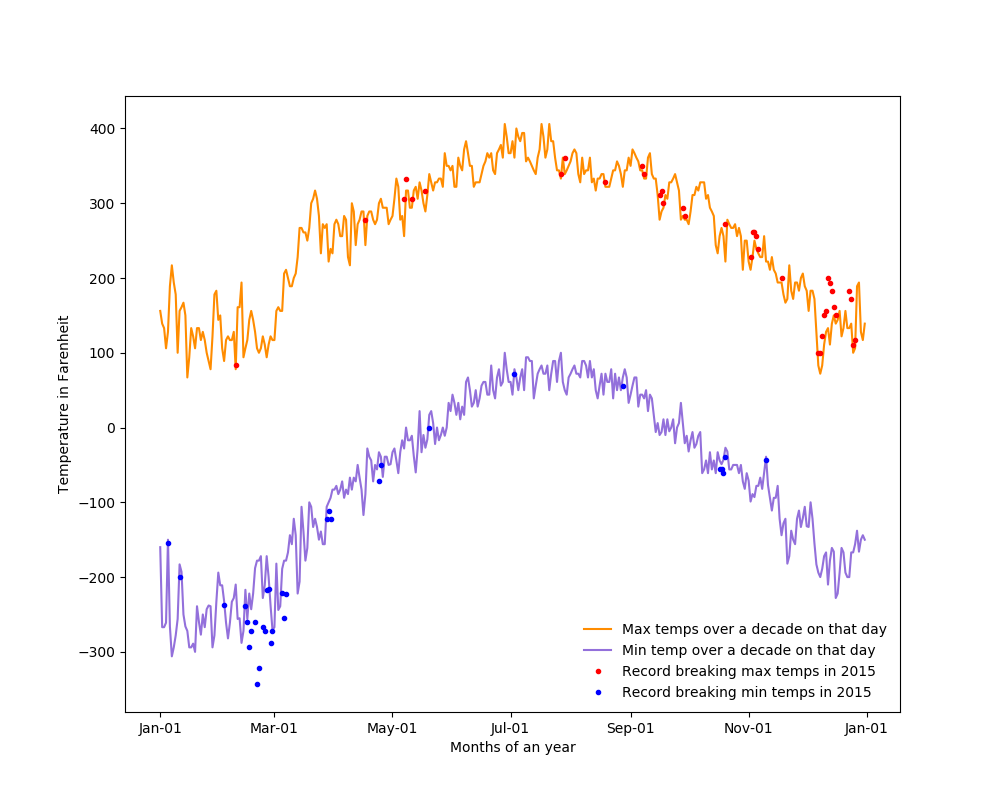

In [62]:
import datetime as dt
fig,ax=plt.subplots(1,1,figsize=(10,8))
ticks=[(dt.date(2017,m,1)-dt.date(2016,12,15)).days for m in range(1,13)]
ax.plot(maxt['Date'],maxt['maxd'],'-',c='darkorange')
ax.plot(mint['Date'],mint['mind'],'-',c='mediumpurple')
plt.show()

In [63]:
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))


In [64]:
ax.set_xlabel('Months of an year')
ax.set_ylabel('Temperature in Farenheit')

Text(0, 0.5, 'Temperature in Farenheit')

In [65]:
#ax.set_xticks(ticks)
#ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Nov','Dec'])

In [66]:
#l1,l2=plt.gca().get_lines()
#x,y1=l1.get_xdata(),l1.get_ydata()
#y2=l2.get_ydata()
#ax.fill_between(x,y1,y2,facecolor='bisque')

In [67]:
ax.plot(maxk15['Date'],maxk15['max1'],'.',c='red')
ax.plot(mink15['Date'],mink15['min1'],'.',c='blue')

In [68]:
maxk15.head()

,Date,max1
0,2015-02-09,83
1,2015-04-17,278
2,2015-05-07,306
3,2015-05-08,333
4,2015-05-11,306


In [69]:
maxk15.tail()

,Date,max1
32,2015-12-16,150
33,2015-12-23,183
34,2015-12-24,172
35,2015-12-25,111
36,2015-12-26,117


In [70]:
plt.legend(['Max temps over a decade on that day','Min temp over a decade on that day','Record breaking max temps in 2015','Record breaking min temps in 2015'],frameon=False)